# Global Power Plant Database

##### Problem Statement:

- Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

 `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

# Prediction :

Make two prediction  1) Primary Fuel    2) capacity_mw 

In [1]:
#Importing necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"E:\database_IND.csv")
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.59665,865.4,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Checking Shape of our Dataset
df.shape

(908, 25)

In [4]:
#Checking Datatype and non null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [5]:
#Checking for null and missing values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [6]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [7]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [8]:
#Dropping Unnecessary coloumns:

df1 = df.drop(columns=['country','country_long','other_fuel1',
                      'other_fuel2','other_fuel3','generation_data_source'],axis=1)

In [9]:
df1.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,NaN
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,NaN


In [10]:
#Finding numerical data :

df1.select_dtypes(include=["number"]).columns

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'wepp_id',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'estimated_generation_gwh'],
      dtype='object')

In [11]:
#Finding categorical data:

df1.select_dtypes(exclude=["number"]).columns

Index(['name', 'gppd_idnr', 'primary_fuel', 'owner', 'source', 'url',
       'geolocation_source'],
      dtype='object')

In [12]:
cat=df[{'name', 'gppd_idnr', 'primary_fuel', 'owner', 'source', 'url','geolocation_source'}]
cat

,source,geolocation_source,gppd_idnr,name,primary_fuel,owner,url
0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,WRI1020239,ACME Solar Tower,Solar,Solar Paces,http://www.nrel.gov/csp/solarpaces/project_det...
1,Ultratech Cement ltd,WRI,WRI1019881,ADITYA CEMENT WORKS,Coal,Ultratech Cement ltd,http://www.ultratechcement.com/
2,CDM,WRI,WRI1026669,AES Saurashtra Windfarms,Wind,AES,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...
3,Central Electricity Authority,WRI,IND0000001,AGARTALA GT,Gas,NaN,http://www.cea.nic.in/
4,Central Electricity Authority,WRI,IND0000002,AKALTARA TPP,Coal,NaN,http://www.cea.nic.in/
...,...,...,...,...,...,...,...
903,Central Electricity Authority,WRI,IND0000513,YERMARUS TPP,Coal,NaN,http://www.cea.nic.in/
904,Karnataka Power Corporation Limited,Industry About,WRI1026222,Yelesandra Solar Power Plant,Solar,Karnataka Power Corporation Limited,http://karnatakapower.com
905,CDM,WRI,WRI1026776,Yelisirur wind power project,Wind,NaN,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...
906,Hindustan Zinc ltd,WRI,WRI1019901,ZAWAR MINES,Coal,Hindustan Zinc ltd,http://www.hzlindia.com/


In [13]:
#Now let's fill up missing data 

df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      908 non-null    object 
 1   gppd_idnr                 908 non-null    object 
 2   capacity_mw               908 non-null    float64
 3   latitude                  862 non-null    float64
 4   longitude                 862 non-null    float64
 5   primary_fuel              908 non-null    object 
 6   commissioning_year        528 non-null    float64
 7   owner                     342 non-null    object 
 8   source                    908 non-null    object 
 9   url                       908 non-null    object 
 10  geolocation_source        889 non-null    object 
 11  wepp_id                   0 non-null      float64
 12  year_of_capacity_data     520 non-null    float64
 13  generation_gwh_2013       384 non-null    float64
 14  generation

In [14]:
#Missing Values

def missing_values(df1, percentage):

    columns = df1.columns
    percent_missing = df1.isnull().sum() * 100 / len(df1)
    missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})

    missing_drop = list(missing_value_df[missing_value_df.percent_missing>percentage].column_name)
    df1 = df1.drop(missing_drop, axis=1)
    return missing_value_df

In [15]:
missing_values(df1,75)

,column_name,percent_missing
name,name,0.000000
gppd_idnr,gppd_idnr,0.000000
capacity_mw,capacity_mw,0.000000
latitude,latitude,5.066079
longitude,longitude,5.066079
primary_fuel,primary_fuel,0.000000
commissioning_year,commissioning_year,41.850220
owner,owner,62.334802
source,source,0.000000
url,url,0.000000


- Removing Columns with above 75% null value

In [16]:
df2 = df1.drop(df1.columns[df1.apply(lambda col: col.isnull().sum()/len(df1) > 0.75)], axis=1)

In [17]:
#Removing Duplicate Values :

df2 = df2.drop_duplicates()

In [18]:
#Filling missing Values in our dataset

df2['latitude']=df2["latitude"].fillna(df2["latitude"].mean())
df2['longitude']=df2["longitude"].fillna(df2["longitude"].mean())
df2['commissioning_year']=df2['commissioning_year'].fillna(df2['commissioning_year'].mode()[0])
#Replacing missing values for commisioning year with mode.
df2['year_of_capacity_data']=df2['year_of_capacity_data'].fillna(df2['year_of_capacity_data'].mode()[0])
#We know for all the data the "year of capacity data" is 2018
df2['generation_gwh_2013']=df2['generation_gwh_2013'].fillna(df2['generation_gwh_2013'].mean())
df2['generation_gwh_2014']=df2['generation_gwh_2014'].fillna(df2['generation_gwh_2014'].mean())
df2['generation_gwh_2015']=df2['generation_gwh_2015'].fillna(df2['generation_gwh_2015'].mean())
df2['generation_gwh_2016']=df2['generation_gwh_2016'].fillna(df2['generation_gwh_2016'].mean())
df2['generation_gwh_2017']=df2['generation_gwh_2017'].fillna(df2['generation_gwh_2017'].mean())
df2['owner']=df2["owner"].fillna(df2["owner"].mode()[0])
df2['geolocation_source']=df2["geolocation_source"].fillna(df2["geolocation_source"].mode()[0])
df2.isna().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
owner                    0
source                   0
url                      0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2013      0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
dtype: int64

In [19]:

#Let's check coloumns value counts and uniqueness :

for i in df2.columns:
    print (i,':',len(df2[i].unique()))


name : 908
gppd_idnr : 908
capacity_mw : 365
latitude : 838
longitude : 829
primary_fuel : 8
commissioning_year : 73
owner : 280
source : 191
url : 304
geolocation_source : 3
year_of_capacity_data : 1
generation_gwh_2013 : 365
generation_gwh_2014 : 375
generation_gwh_2015 : 399
generation_gwh_2016 : 406
generation_gwh_2017 : 411


In [20]:
df2['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

# Data Visualisation

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

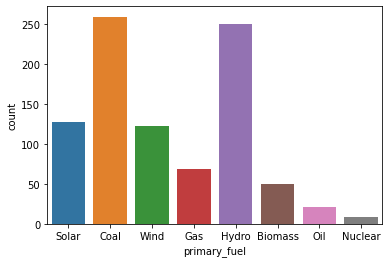

In [21]:
sns.countplot(x='primary_fuel',data=df1)

### Power Plants with primary fuel as 'Coal' and 'Hydro' are more in country.
### There are very less nuclear power plant in India.

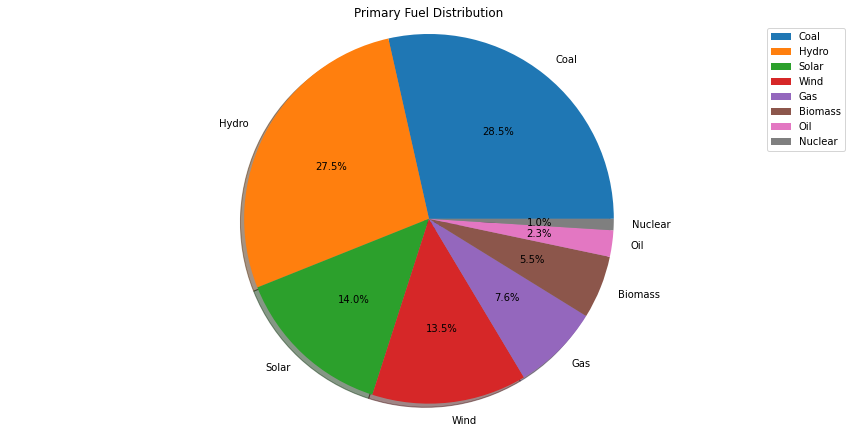

In [22]:
plt.figure(figsize=(12,6))
plt.style.use('default')
plt.pie(df1['primary_fuel'].value_counts(),labels=df1['primary_fuel'].value_counts().index,shadow=True,autopct='%1.1f%%')
plt.title('Primary Fuel Distribution')
plt.legend()
plt.legend(prop={'size':10})
plt.axis('equal')
plt.tight_layout()
plt.show()

797.0634749999999

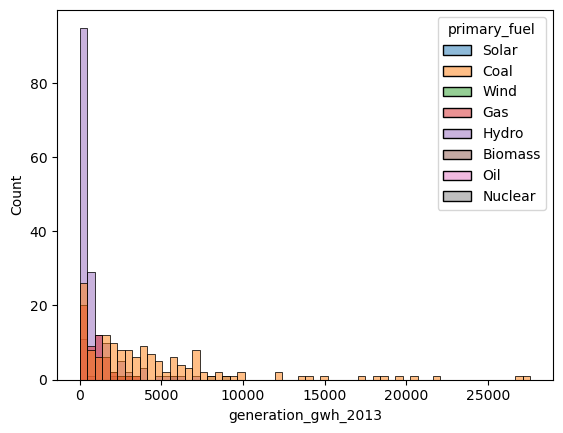

In [23]:

sns.histplot(x='generation_gwh_2013',hue='primary_fuel',data=df1,bins=60)
df1.generation_gwh_2013.median()

805.76

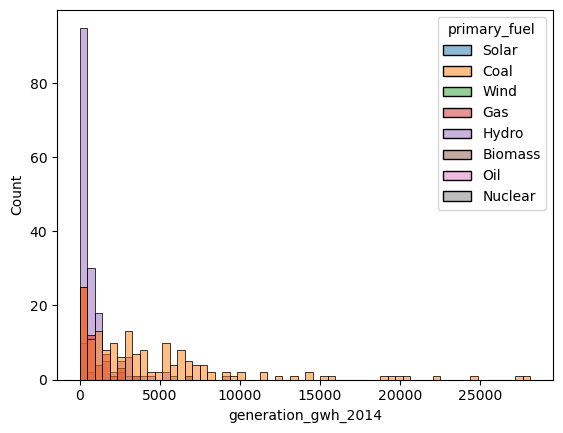

In [24]:
sns.histplot(x='generation_gwh_2014',data=df1,hue='primary_fuel',bins=60)
df1.generation_gwh_2014.median()

701.02725

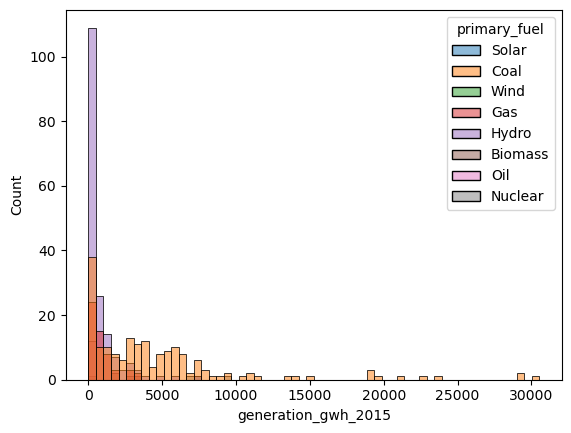

In [25]:

sns.histplot(x='generation_gwh_2015',data=df1,hue='primary_fuel',bins=60)
df1.generation_gwh_2015.median()

716.7283500000002

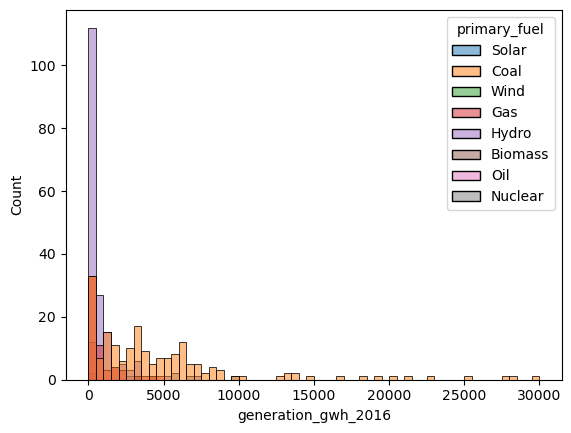

In [26]:
sns.histplot(data=df1,x='generation_gwh_2016',hue='primary_fuel',bins=60)
df1.generation_gwh_2016.median()

807.6016999999998

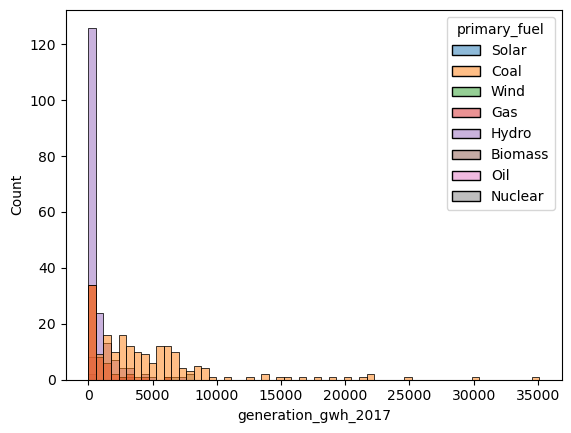

In [27]:
sns.histplot(data=df1,x='generation_gwh_2017',hue='primary_fuel',bins=60)
df1.generation_gwh_2017.median()

### From above visualisation we can conclude that the average generation per year lies between  2300 - 2600 gwh.

### In 2017 , count of power plant operated with hydro fuel had increase.

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

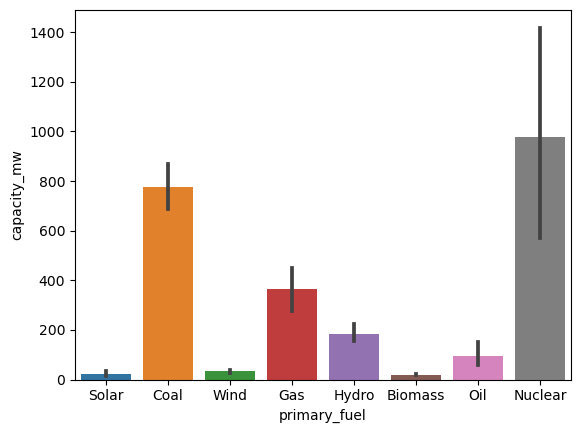

In [28]:
#Comparing capacity of each power plant as per fuel type

sns.barplot(x='primary_fuel',y='capacity_mw',data=df)


### Power plant running with nuclear fuel and coal fuel are of higher capacity.

<AxesSubplot:xlabel='commissioning_year', ylabel='capacity_mw'>

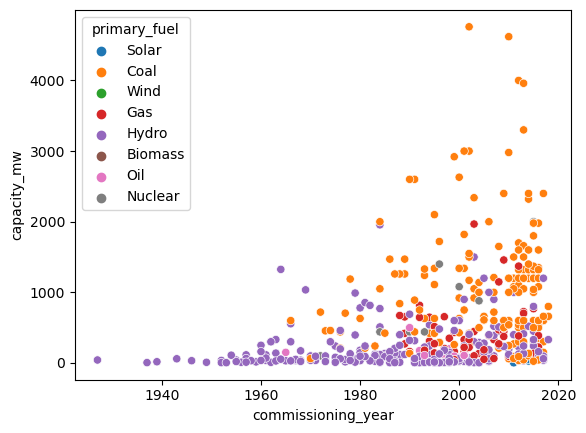

In [29]:
sns.scatterplot(x='commissioning_year',y='capacity_mw',hue='primary_fuel',data=df,alpha=1)

### From above plot we conclude following :

- Since 20th century,water is traditional fuel used for power plants.
- Hydro power plants are low capacity power plants 
- Oil,Gas and Wind power plants are more superior as compared with hydro power plants.
- Coal and nuclear power plants are of highest capacity and hence power generation is more.

In [30]:
df2.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'year_of_capacity_data', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017'],
      dtype='object')

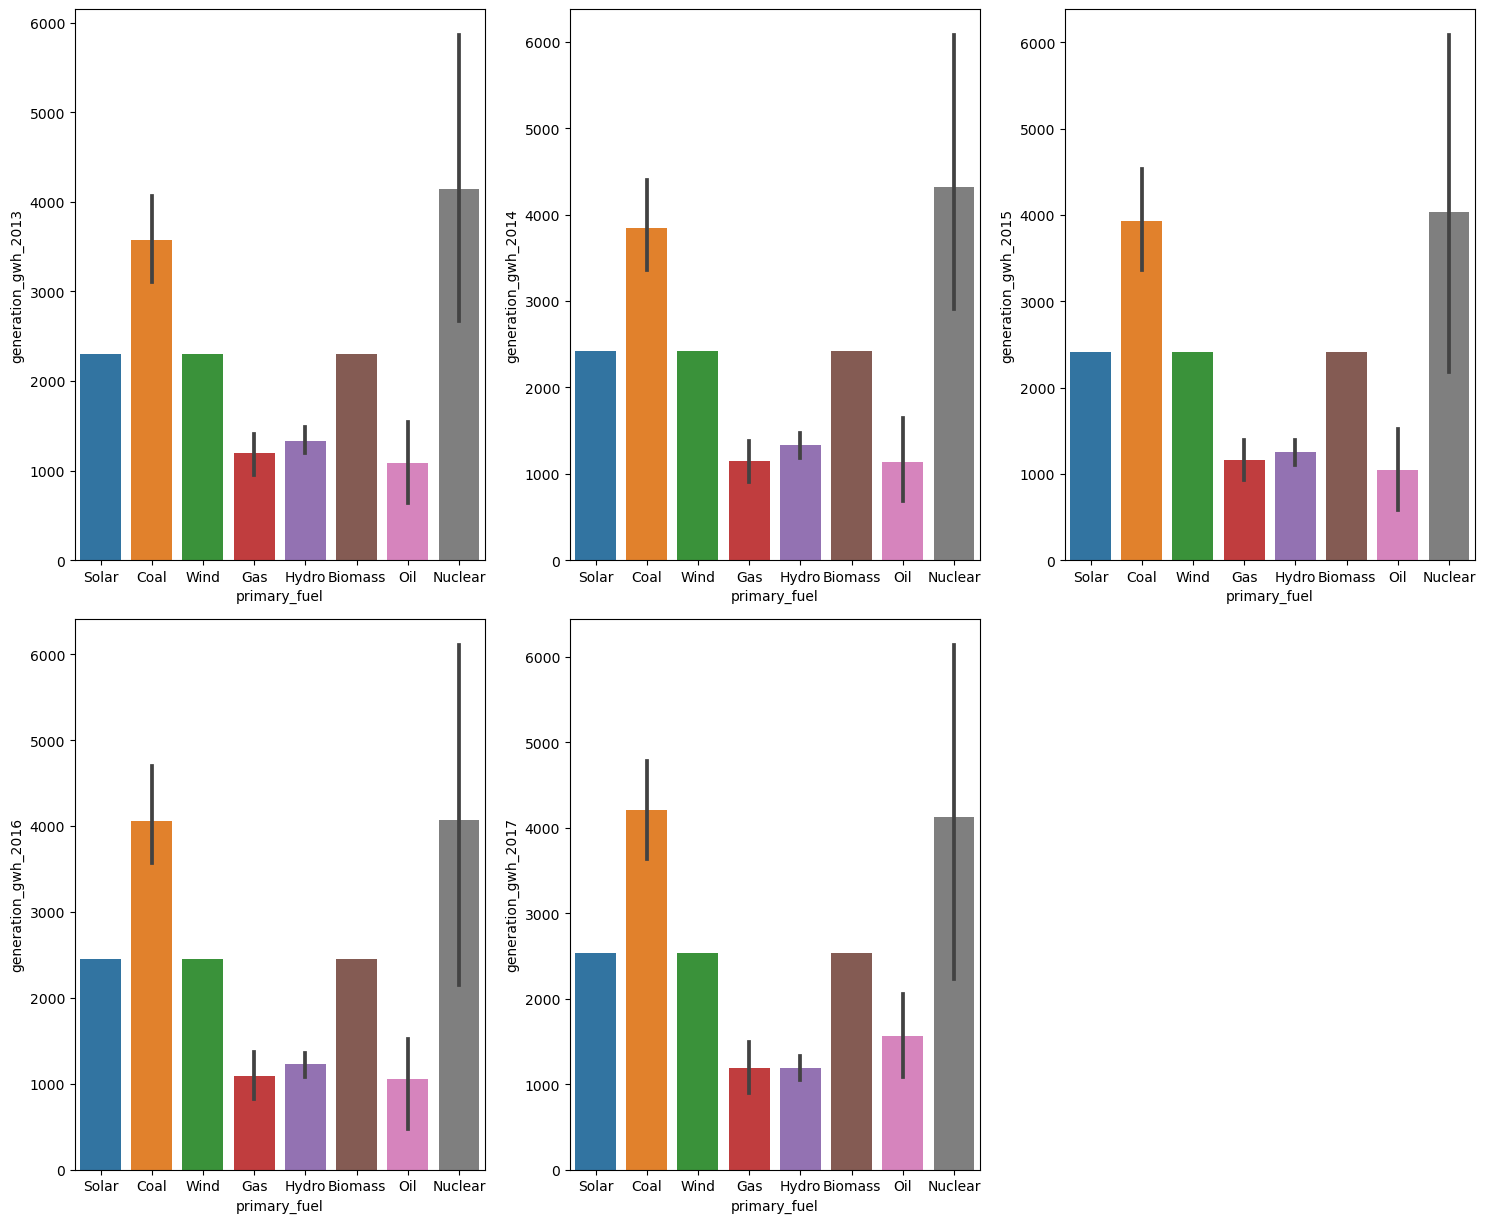

In [31]:
X=df2.drop(columns=[ 'name', 'gppd_idnr', 'capacity_mw', 'primary_fuel','owner','source','url','latitude', 'longitude',
                    
       'commissioning_year', 'source', 'year_of_capacity_data','geolocation_source'],axis=1)

Y=df2['primary_fuel']

plt.figure(figsize=(15,18))

plotnumber=1

for column in X:
    if plotnumber<=9 : 
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(Y,X[column])
        
    plotnumber+=1
plt.tight_layout()

### Power generation from Coal fuel type power plant has increased a little bit since 2013

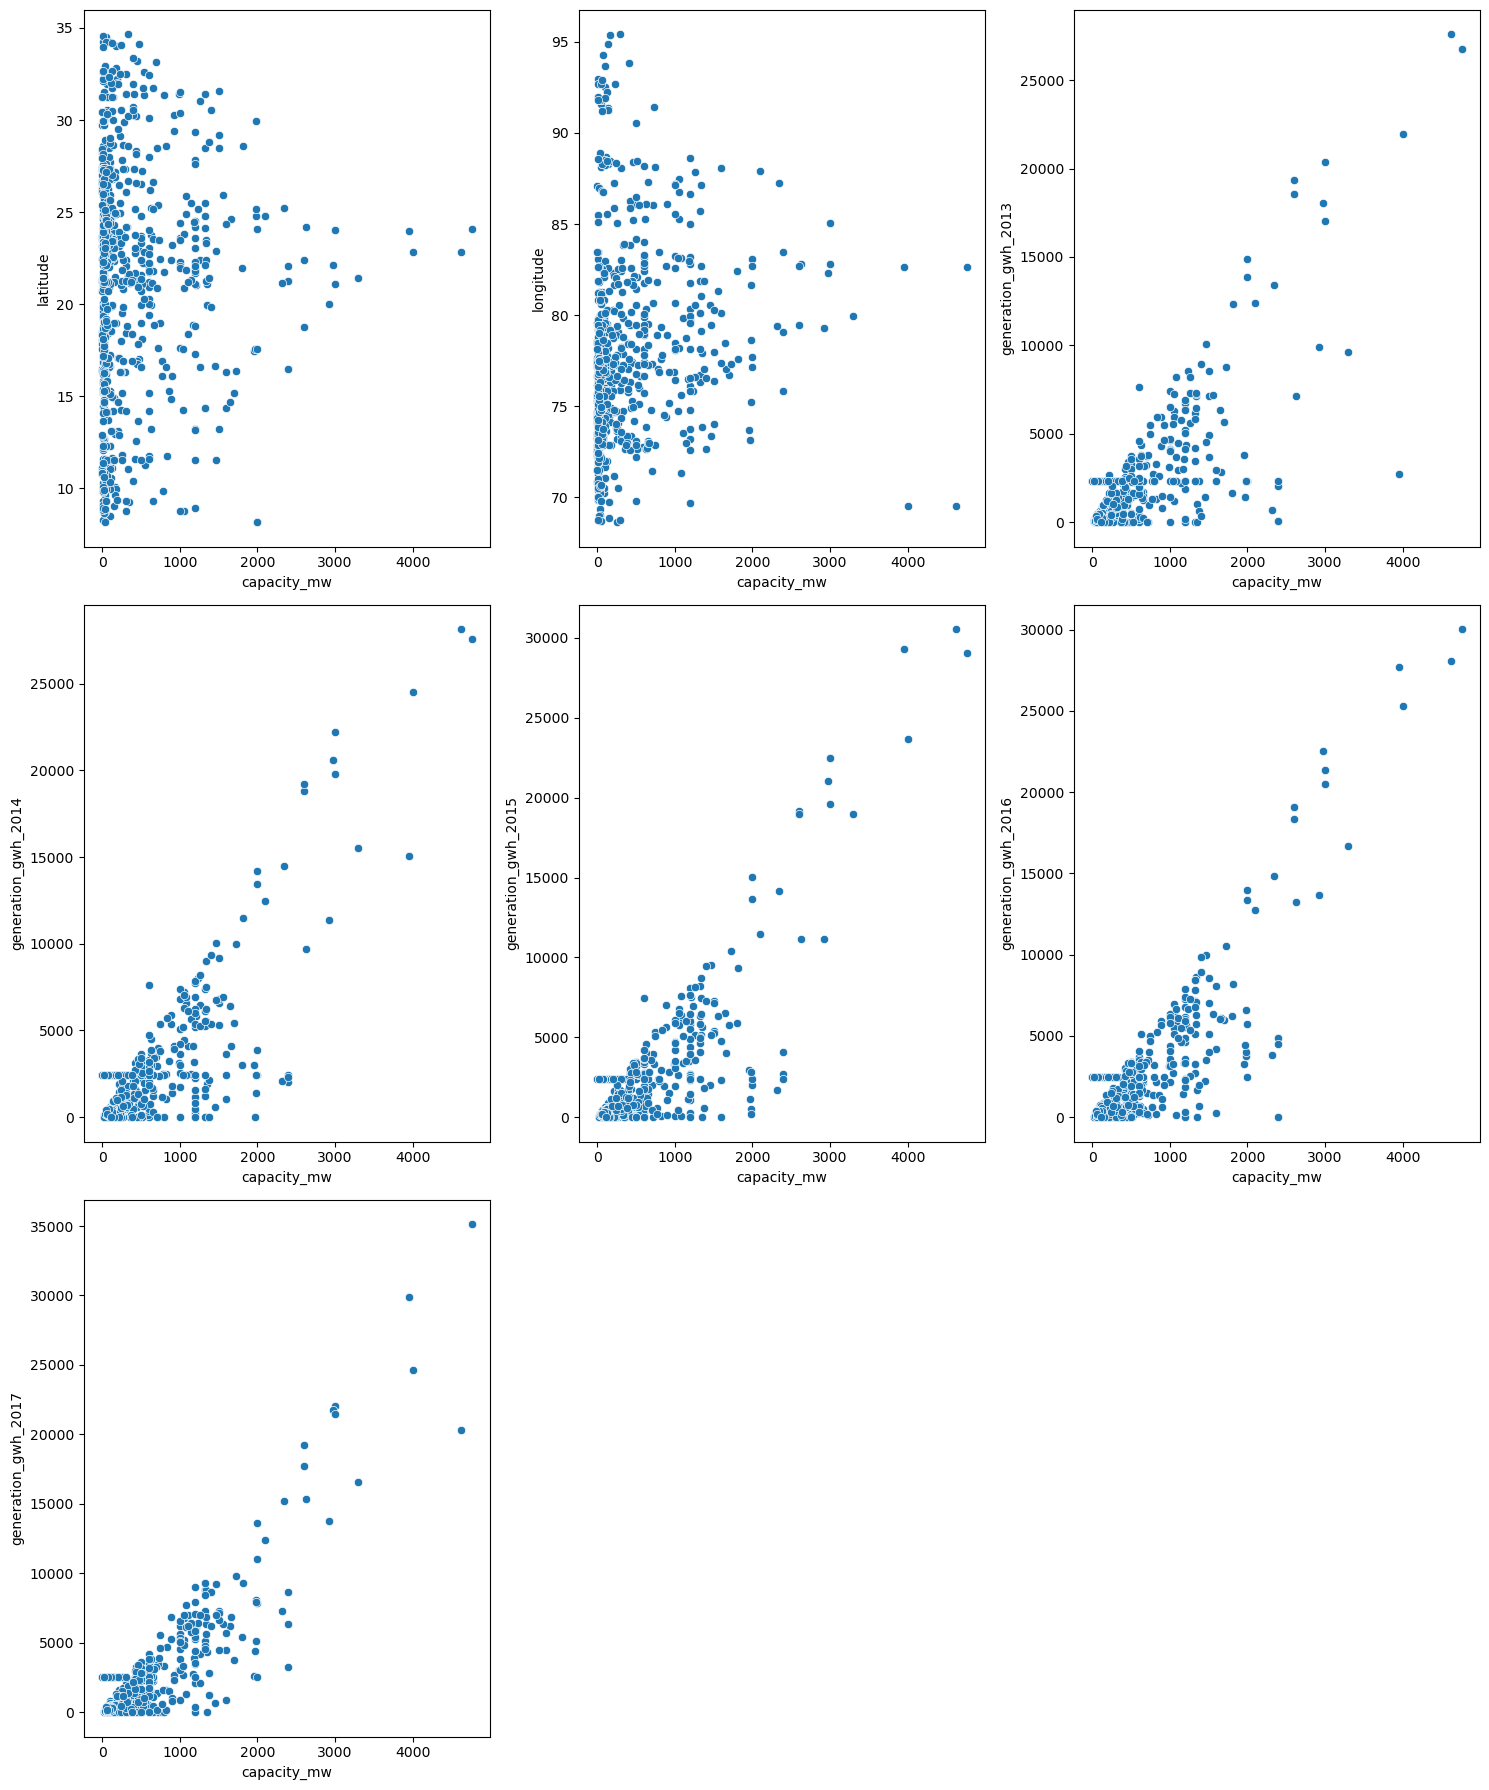

In [32]:
#Checking Relationship between Capacity and power generation

X1=df2.drop(columns=[ 'name', 'gppd_idnr', 'capacity_mw', 'primary_fuel','owner','source','url',
                    
       'commissioning_year', 'source', 'year_of_capacity_data','geolocation_source'],axis=1)

Y1=df2['capacity_mw']



plt.figure(figsize=(15,18))

plotnumber=1

for column in X1:
    if plotnumber<=9 : 
        ax=plt.subplot(3,3,plotnumber)
        sns.scatterplot(Y1,X1[column])
        
    plotnumber+=1
plt.tight_layout()

- Most of the latitude between 70 and 87 degree are having capacity between 0 and 1000MW

- Most of the latitude between 70 and 87 degree are having capacity between 0 and 1000MW

- Higher the capacity of powerplant higher will be the generation.

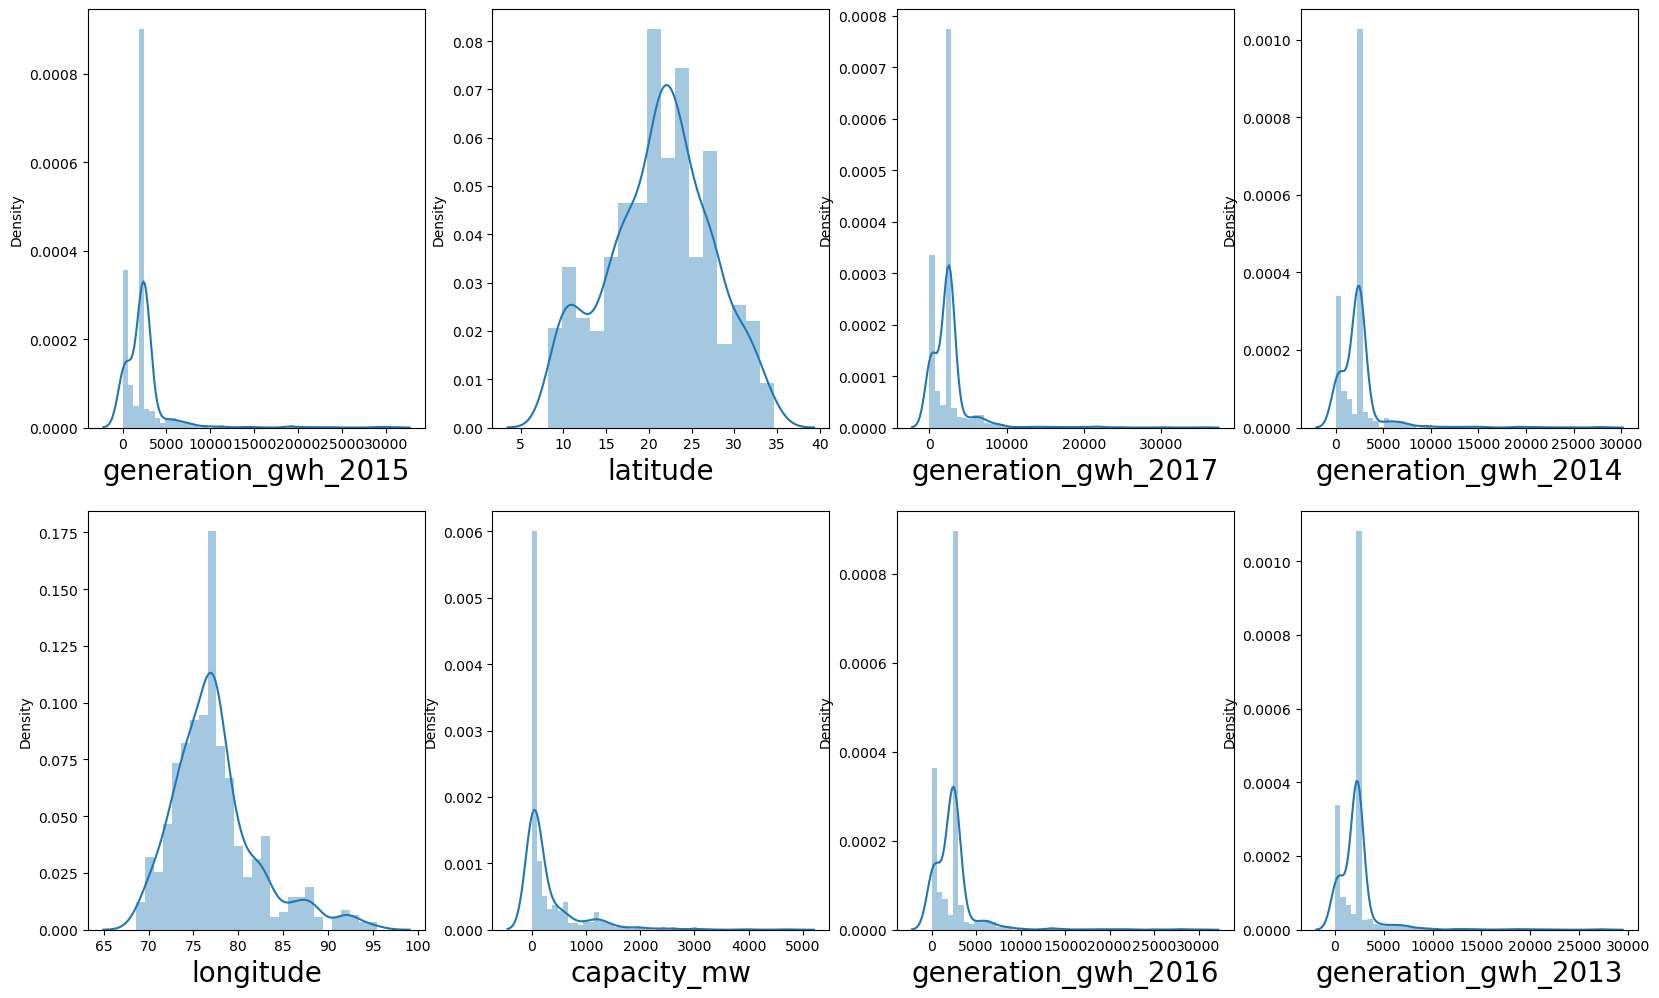

In [33]:
#Numerical Data Distribution :

num=df2[{'capacity_mw','latitude','longitude','generation_gwh_2013', 'generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'}]


#understanding numerical data
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(num[column])        
        plt.xlabel(column,fontsize=20)

    plotnumber+=1


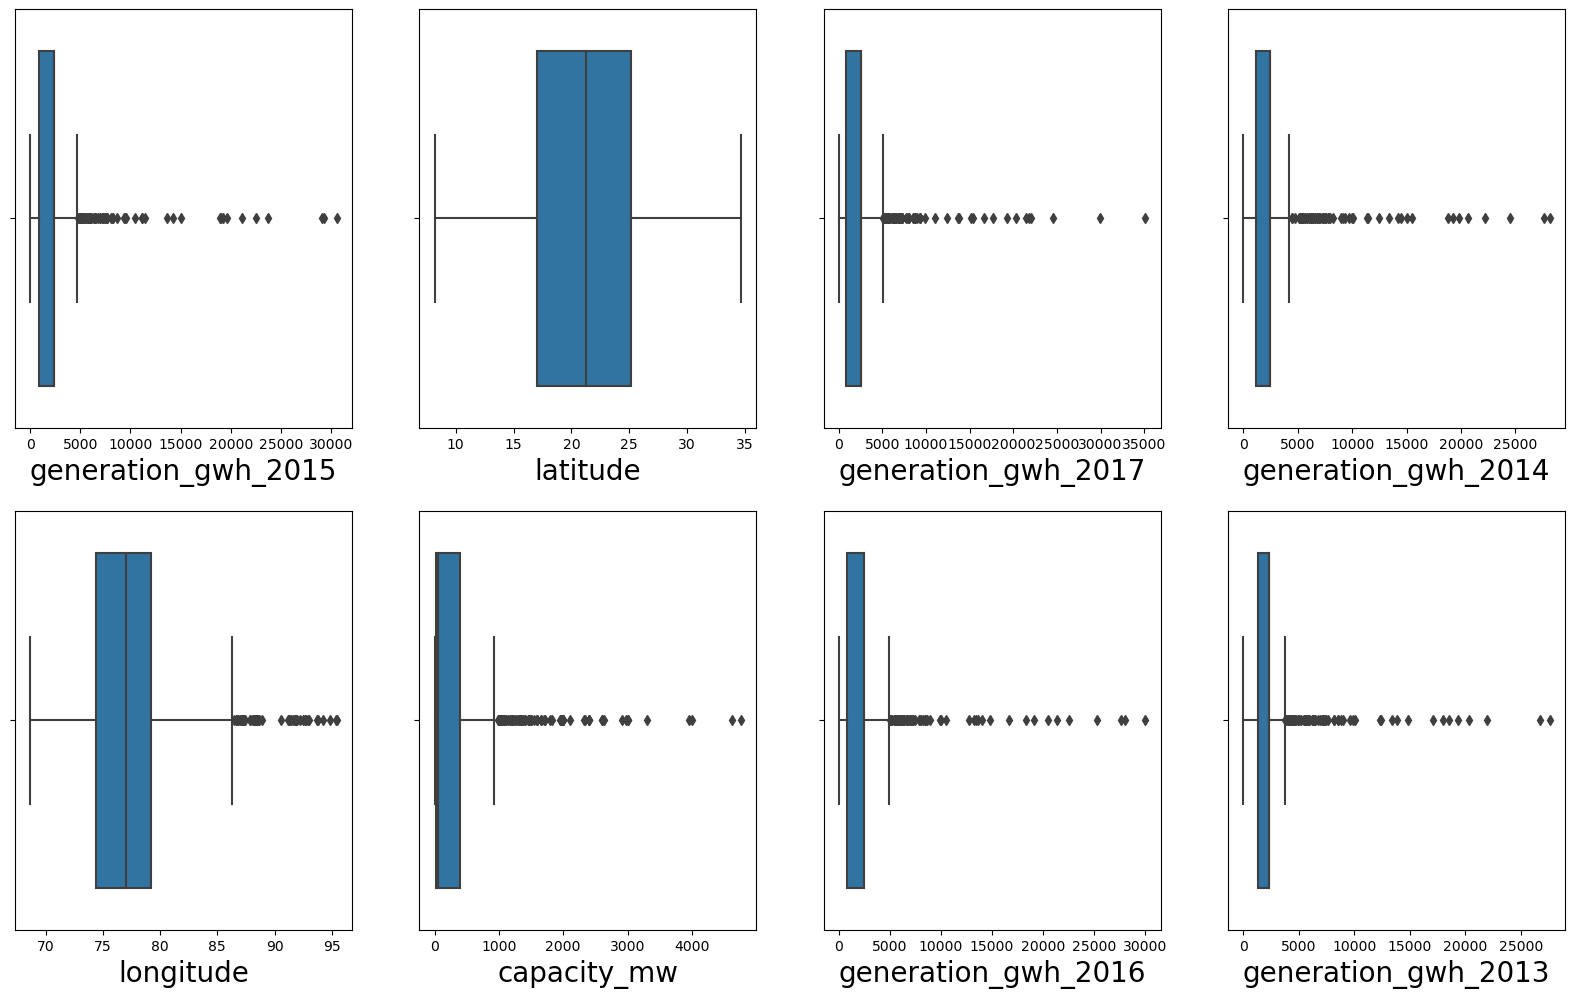

In [34]:
#Checking outliers Using Box plot :

num=df2[{'capacity_mw','latitude','longitude','generation_gwh_2013', 'generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'}]


#understanding numerical data
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(num[column])        
        plt.xlabel(column,fontsize=20)

    plotnumber+=1


##### Highest value:

- longitude is 78 and latitude is 22

- generation_gwh_2017 is 3000,generation_gwh_2014 is 2200,generation_gwh_2013 is 2200,generation_gwh_2015 is 2200, generation_gwh_2016 is 2200


##### From box plot we conclude that there are outliers present in our data that we need to treat.

In [35]:
#Removing Outliers for numerical data :

df2.select_dtypes(include=["number"]).columns

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [36]:
num=df2[{'capacity_mw','latitude','longitude','generation_gwh_2013', 'generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'}]
num

,generation_gwh_2015,latitude,generation_gwh_2017,generation_gwh_2014,longitude,capacity_mw,generation_gwh_2016,generation_gwh_2013
0,2414.072373,28.1839,2531.754458,2420.393316,73.2407,2.5,2453.936292,2304.059202
1,2414.072373,24.7663,2531.754458,2420.393316,74.6090,98.0,2453.936292,2304.059202
2,2414.072373,21.9038,2531.754458,2420.393316,69.3732,39.2,2453.936292,2304.059202
3,843.747000,23.8712,663.774500,617.789264,91.3602,135.0,886.004428,631.777928
4,5916.370000,21.9603,5385.579736,3035.550000,82.4091,1800.0,6243.000000,1668.290000
...,...,...,...,...,...,...,...,...
903,0.994875,16.2949,865.400000,2420.393316,77.3568,1600.0,233.596650,2304.059202
904,2414.072373,12.8932,2531.754458,2420.393316,78.1654,3.0,2453.936292,2304.059202
905,2414.072373,15.2758,2531.754458,2420.393316,75.5811,25.5,2453.936292,2304.059202
906,2414.072373,24.3500,2531.754458,2420.393316,73.7477,80.0,2453.936292,2304.059202


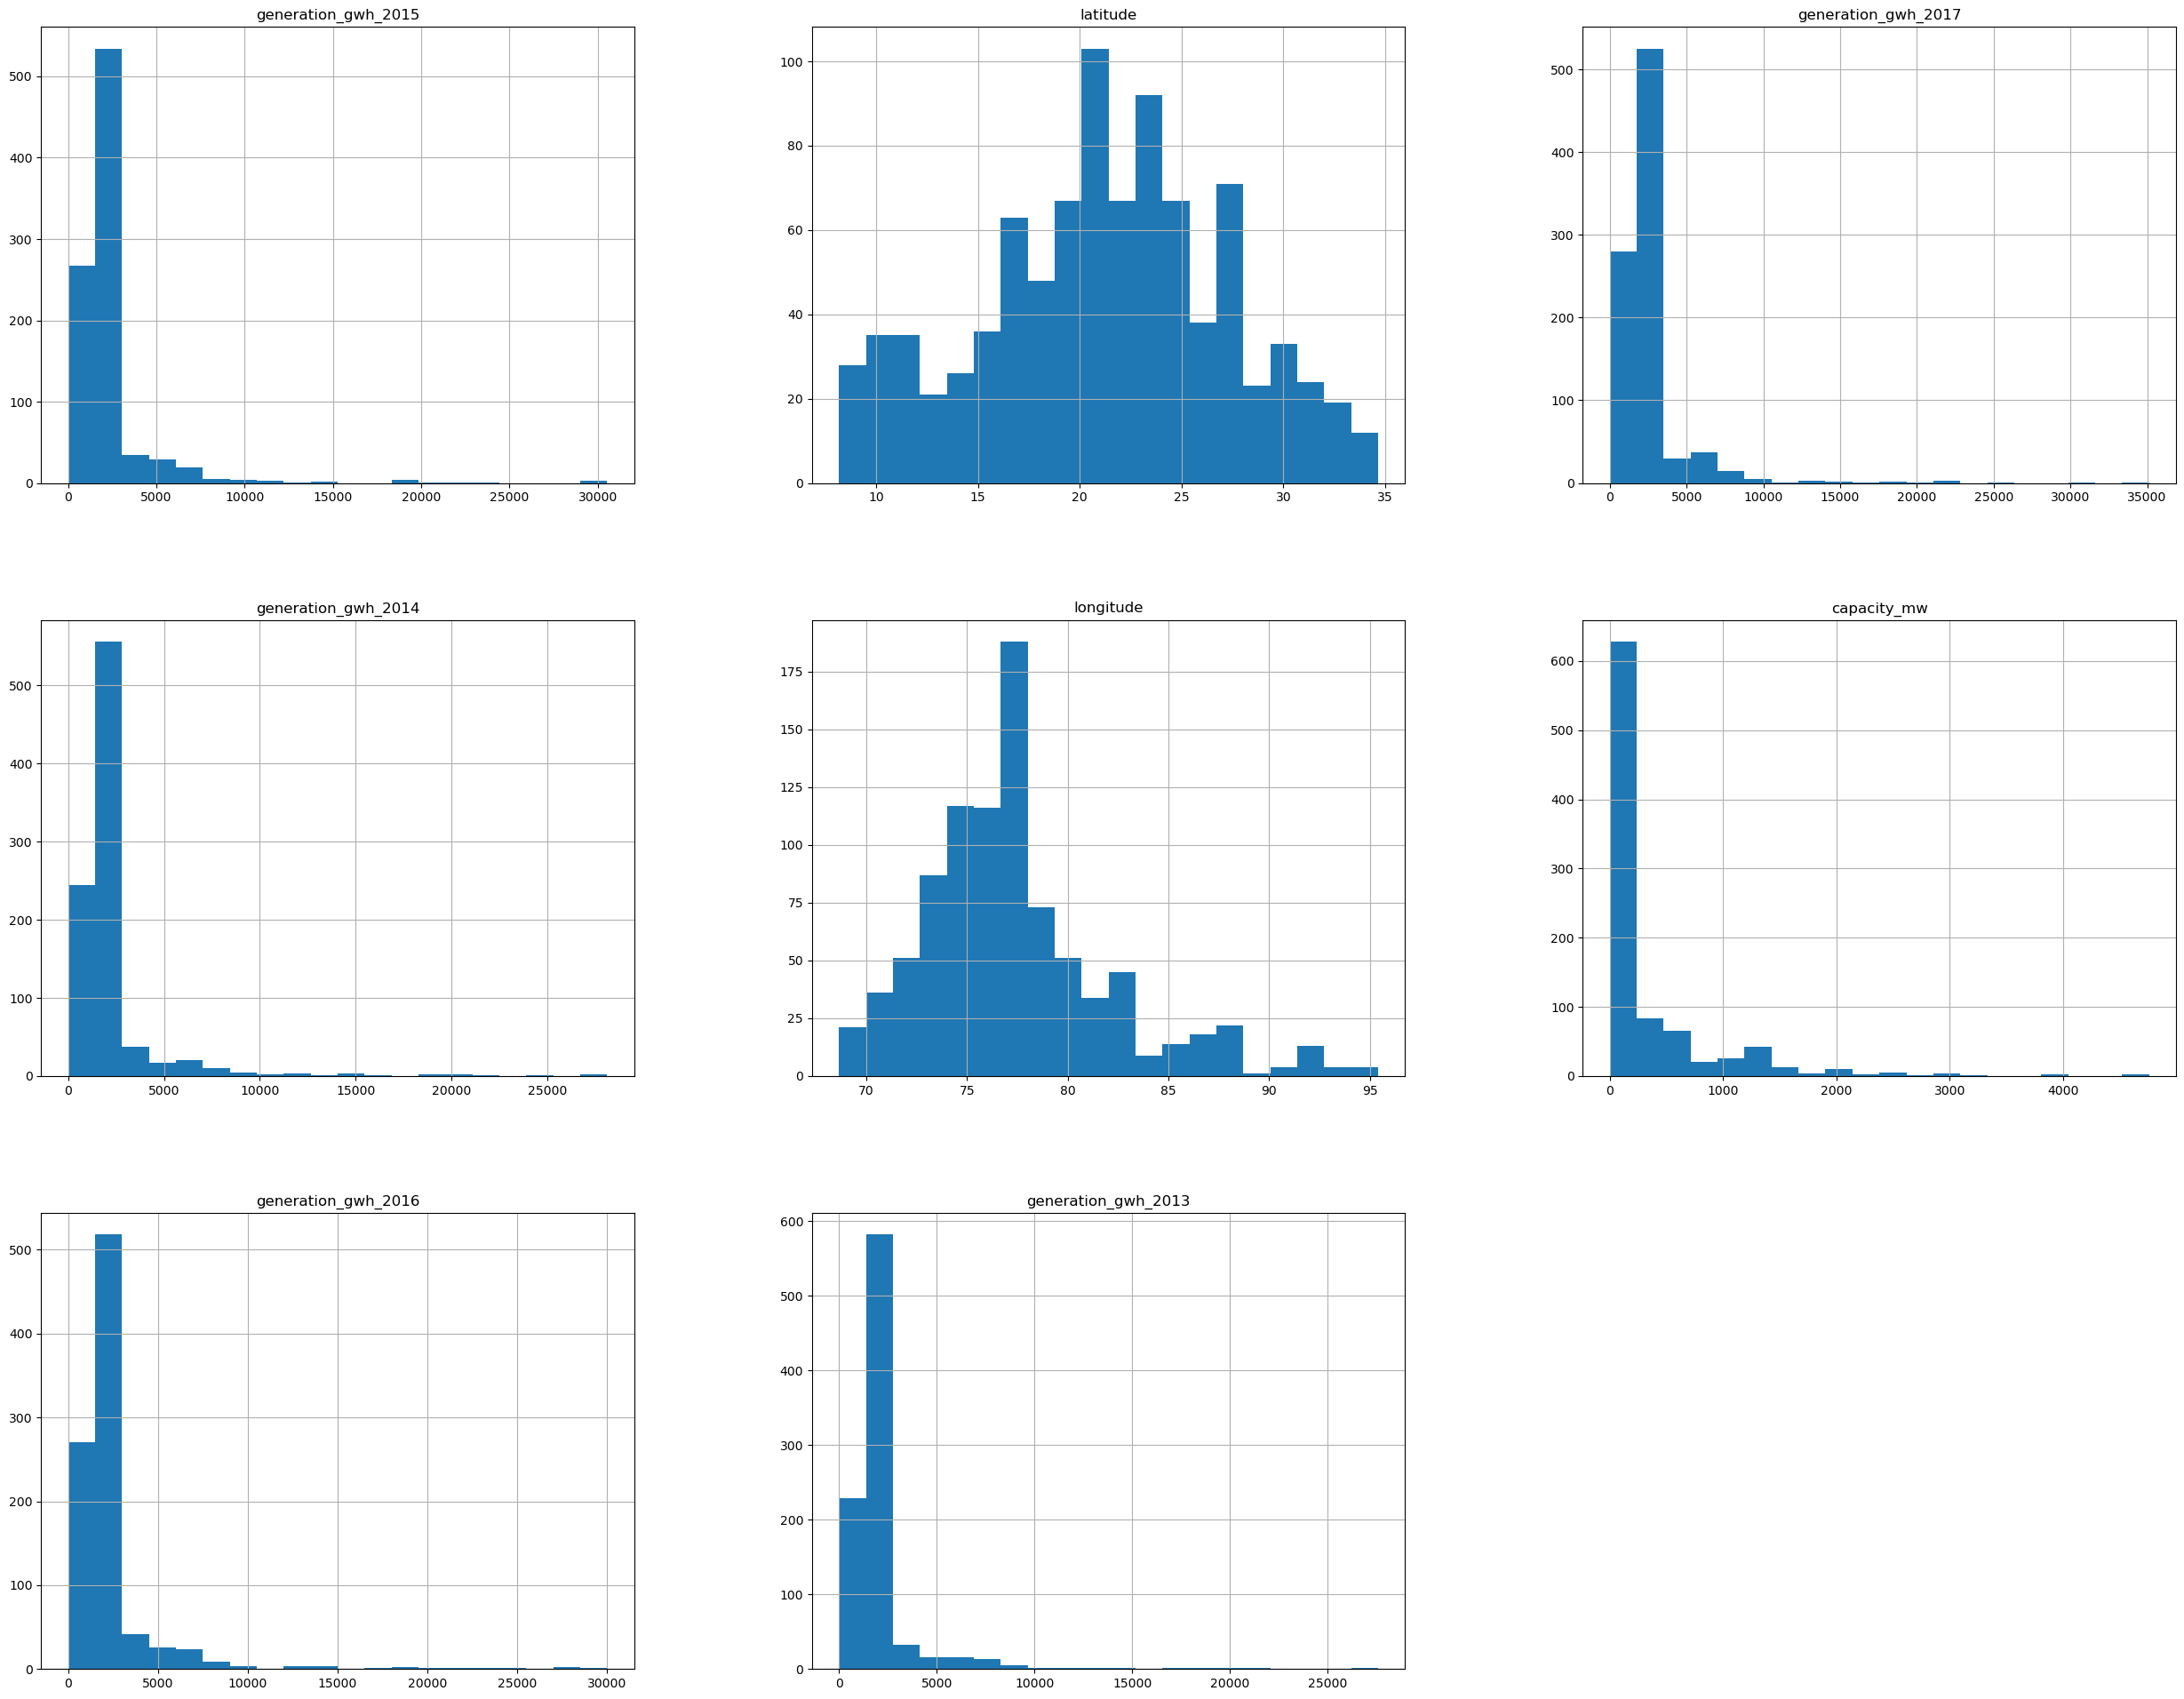

In [37]:
num.hist(figsize=(31,24),bins = 20)
plt.title("Features Distribution")
plt.show()

In [38]:
#Z-score method to remove outliers

from scipy.stats import zscore

z=np.abs(zscore(num))
threshold=3
df3=df2[(z<3).all(axis=1)]

print("rows before applying zscore: ",len(df2))
print("rows after applying zscore: ",len(df3))

rows before applying zscore:  908
rows after applying zscore:  867


In [39]:
df3.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,2013.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,2013.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


In [40]:
# Removing Skewness :

df3.skew()

capacity_mw              2.017835
latitude                -0.103418
longitude                0.864288
commissioning_year      -1.823597
year_of_capacity_data    0.000000
generation_gwh_2013      1.529639
generation_gwh_2014      1.441757
generation_gwh_2015      1.328513
generation_gwh_2016      1.354065
generation_gwh_2017      1.250408
dtype: float64

In [41]:
num=df3[{'capacity_mw','latitude','longitude','generation_gwh_2013', 'generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'}]

for col in num:
    if num.skew().loc[col]>0.55:
        df3[col]=np.log1p(df3[col])

In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 867 entries, 0 to 907
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   867 non-null    object 
 1   gppd_idnr              867 non-null    object 
 2   capacity_mw            867 non-null    float64
 3   latitude               867 non-null    float64
 4   longitude              867 non-null    float64
 5   primary_fuel           867 non-null    object 
 6   commissioning_year     867 non-null    float64
 7   owner                  867 non-null    object 
 8   source                 867 non-null    object 
 9   url                    867 non-null    object 
 10  geolocation_source     867 non-null    object 
 11  year_of_capacity_data  867 non-null    float64
 12  generation_gwh_2013    867 non-null    float64
 13  generation_gwh_2014    867 non-null    float64
 14  generation_gwh_2015    867 non-null    float64
 15  genera

In [43]:
#Adding column plant age :

df3['plant_age'] = 2018 - df3['commissioning_year']
df3.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,plant_age
0,ACME Solar Tower,WRI1020239,1.252763,28.1839,4.307313,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2018.0,7.742862,7.792098,7.789485,7.805856,7.837063,7.0
1,ADITYA CEMENT WORKS,WRI1019881,4.595120,24.7663,4.325575,Coal,2013.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2018.0,7.742862,7.792098,7.789485,7.805856,7.837063,5.0
2,AES Saurashtra Windfarms,WRI1026669,3.693867,21.9038,4.253813,Wind,2013.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2018.0,7.742862,7.792098,7.789485,7.805856,7.837063,5.0
3,AGARTALA GT,IND0000001,4.912655,23.8712,4.525696,Gas,2004.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,6.450120,6.427765,6.739037,6.787850,6.499448,14.0
4,AKALTARA TPP,IND0000002,7.496097,21.9603,4.423757,Coal,2015.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,7.420154,8.018477,8.685647,8.739376,8.591666,3.0


In [44]:
df4 = df3.drop(columns=[ 'name', 'gppd_idnr','source', 'year_of_capacity_data',
                       'geolocation_source','commissioning_year','url','owner'],axis=1)

In [45]:
#Encoding using one hot encoder :

df_final = pd.get_dummies(df4,drop_first=True)
df_final.head()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,plant_age,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
0,1.252763,28.1839,4.307313,7.742862,7.792098,7.789485,7.805856,7.837063,7.0,0,0,0,0,0,1,0
1,4.595120,24.7663,4.325575,7.742862,7.792098,7.789485,7.805856,7.837063,5.0,1,0,0,0,0,0,0
2,3.693867,21.9038,4.253813,7.742862,7.792098,7.789485,7.805856,7.837063,5.0,0,0,0,0,0,0,1
3,4.912655,23.8712,4.525696,6.450120,6.427765,6.739037,6.787850,6.499448,14.0,0,1,0,0,0,0,0
4,7.496097,21.9603,4.423757,7.420154,8.018477,8.685647,8.739376,8.591666,3.0,1,0,0,0,0,0,0


<AxesSubplot:>

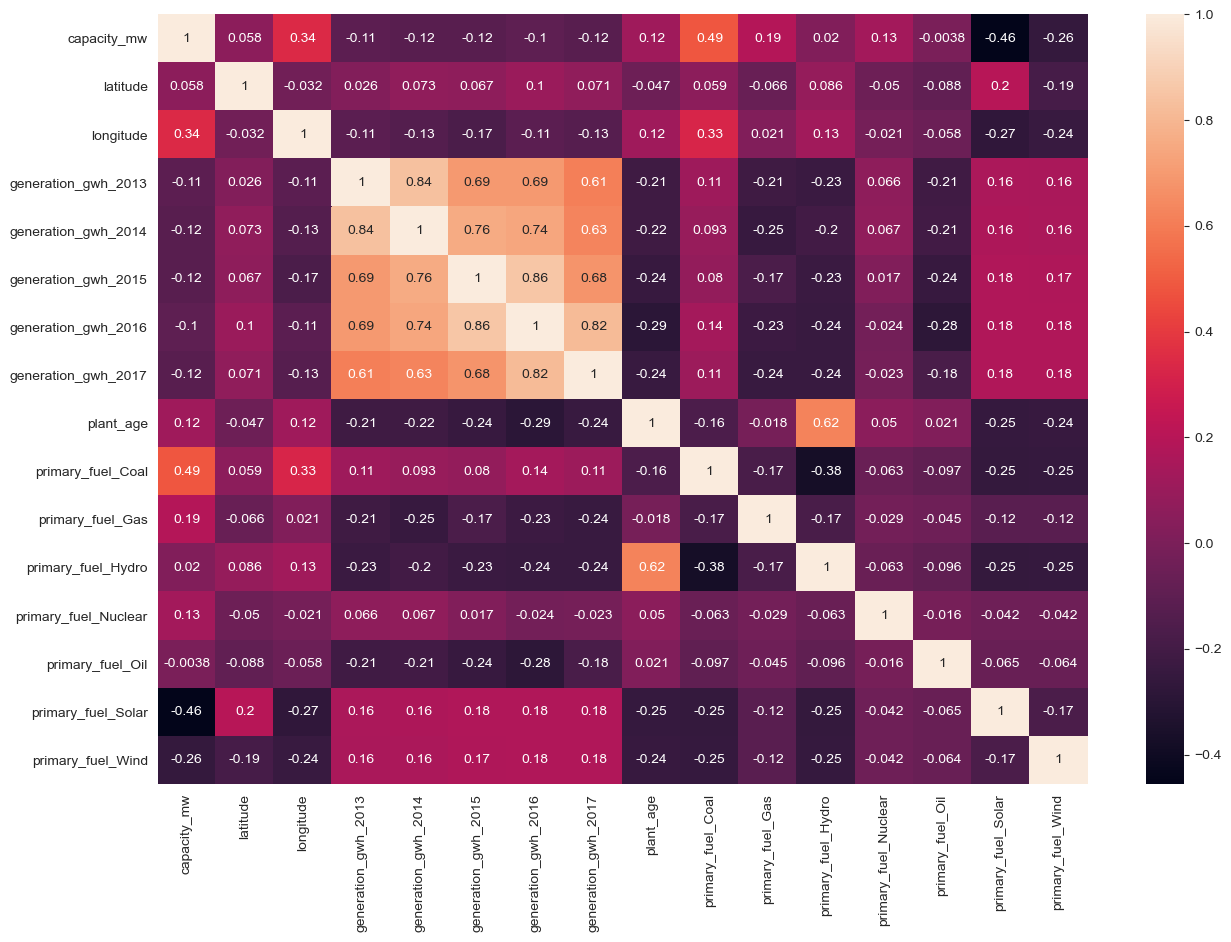

In [46]:
#Checking Correlation using Heatmap

sns.set_style("darkgrid")
plt.figure(figsize=(15,10))
corr = df_final.corr()
sns.heatmap(corr, annot=True)

# Model Instatiation and Building

### 1.) To predict Capacity

In [47]:
#Seperating columns in label and target

X=df_final.drop(columns=['capacity_mw'],axis=1)
Y=df_final['capacity_mw']

In [48]:
#Scaling Feature Data

from sklearn.preprocessing import StandardScaler


In [49]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

In [52]:
#Importing all regression models : 

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [53]:
#Finding Best Random State on Random Forest

from sklearn.ensemble import RandomForestRegressor

max_accu=0
max_rs = 0
for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.25, random_state = i)
    rf = RandomForestRegressor()
    rf.fit(x_train,y_train)
    pred = rf.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.8759967250384199 on Random State 201


In [54]:
#Splitting Data into train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.25,random_state=201)

# Linear Regression

In [55]:
result=[]
#To save model scores
mse=[]
#To save Mean Squared Error scores

In [56]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_lr_pred=lr.predict(x_test)
r2_lr=r2_score(y_test,y_lr_pred)

print("R2 SCORE :",r2_lr)
print("Mean Squared Error : ",mean_squared_error(y_test,y_lr_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_lr_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_lr_pred)))

result.append(r2_lr)
mse.append(mean_squared_error(y_test,y_lr_pred))

R2 SCORE : 0.5165155065000094
Mean Squared Error :  1.775492868697941
Mean Absolute Error :  1.104869434688705
Root Mean squared Error :  1.3324762169351996


# Random Forest Regressor

In [57]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_rfr_pred=rfr.predict(x_test)
r2_rfr=r2_score(y_test,y_rfr_pred)

print("R2 SCORE :",r2_rfr)
print("Mean Squared Error : ",mean_squared_error(y_test,y_rfr_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_rfr_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_rfr_pred)))

result.append(r2_rfr)
mse.append(mean_squared_error(y_test,y_rfr_pred))

R2 SCORE : 0.8716831883557894
Mean Squared Error :  0.4712159067586668
Mean Absolute Error :  0.5131177602382255
Root Mean squared Error :  0.6864516783857891


# GradientBoostingRegressor

In [58]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_gbr_pred=gbr.predict(x_test)
r2_gbr=r2_score(y_test,y_gbr_pred)

print("R2 SCORE :",r2_gbr)
print("Mean Squared Error : ",mean_squared_error(y_test,y_gbr_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_gbr_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_gbr_pred)))

result.append(r2_gbr)
mse.append(mean_squared_error(y_test,y_gbr_pred))

R2 SCORE : 0.860858795619357
Mean Squared Error :  0.5109661621854669
Mean Absolute Error :  0.5546988821708723
Root Mean squared Error :  0.714818971618316


# DecisionTreeRegressor

In [59]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_dtr_pred=dtr.predict(x_test)
r2_dtr=r2_score(y_test,y_dtr_pred)

print("R2 SCORE :",r2_dtr)
print("Mean Squared Error : ",mean_squared_error(y_test,y_dtr_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_dtr_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_dtr_pred)))

result.append(r2_dtr)
mse.append(mean_squared_error(y_test,y_dtr_pred))

R2 SCORE : 0.7894982580074266
Mean Squared Error :  0.773022396335272
Mean Absolute Error :  0.6447193973886405
Root Mean squared Error :  0.879216922229817


# SVR

In [60]:
svr=SVR()
svr.fit(x_train,y_train)
y_svr_pred=svr.predict(x_test)
r2_svr=r2_score(y_test,y_svr_pred)

print("R2 SCORE :",r2_svr)
print("Mean Squared Error : ",mean_squared_error(y_test,y_svr_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_svr_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_svr_pred)))

result.append(r2_svr)
mse.append(mean_squared_error(y_test,y_svr_pred))

R2 SCORE : 0.6537499890181271
Mean Squared Error :  1.271528732668468
Mean Absolute Error :  0.8791603555676941
Root Mean squared Error :  1.1276208284119569


- Reguralization Techniques

# Ridge

In [61]:
rg=Ridge(alpha=0.001)
rg.fit(x_train,y_train)
y_rg_pred=rg.predict(x_test)
r2_rg=r2_score(y_test,y_rg_pred)

print("R2 SCORE :",r2_rg)
print("Mean Squared Error : ",mean_squared_error(y_test,y_rg_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_rg_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_rg_pred)))

result.append(r2_rg)
mse.append(mean_squared_error(y_test,y_rg_pred))

R2 SCORE : 0.5165153168709105
Mean Squared Error :  1.775493565070043
Mean Absolute Error :  1.1048701492757047
Root Mean squared Error :  1.3324764782426903


# Lasso

In [62]:
ls=Lasso(alpha=0.0002)
ls.fit(x_train,y_train)
y_ls_pred=rg.predict(x_test)
r2_ls=r2_score(y_test,y_ls_pred)

print("R2 SCORE :",r2_ls)
print("Mean Squared Error : ",mean_squared_error(y_test,y_ls_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_ls_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_ls_pred)))

result.append(r2_ls)
mse.append(mean_squared_error(y_test,y_ls_pred))

R2 SCORE : 0.5165153168709105
Mean Squared Error :  1.775493565070043
Mean Absolute Error :  1.1048701492757047
Root Mean squared Error :  1.3324764782426903


##### CROSS VALIDATION SCORE FOR ALL  MODELS :

In [63]:
cvlr=cross_val_score(rfr,X,Y,cv=5)
cvrfr=cross_val_score(rfr,X,Y,cv=5)
cvdtr=cross_val_score(dtr,X,Y,cv=5)
cvsvr=cross_val_score(svr,X,Y,cv=5)
cvgbr=cross_val_score(gbr,X,Y,cv=5)
cvrg=cross_val_score(rg,X,Y,cv=5)
cvls=cross_val_score(ls,X,Y,cv=5)

print("CV SCORE LR : " , cvlr.mean())
print("CV SCORE RFR : " , cvrfr.mean())
print("CV SCORE DTR : " , cvdtr.mean())
print("CV SCORE SVR : " , cvsvr.mean())
print("CV SCORE GBR : " , cvgbr.mean())
print("CV SCORE Ridge : " , cvrg.mean())
print("CV SCORE Lasso : " , cvls.mean())

CV SCORE LR :  0.7942126414979506
CV SCORE RFR :  0.793147078670497
CV SCORE DTR :  0.6686100319015365
CV SCORE SVR :  0.13079375648502142
CV SCORE GBR :  0.7969805324806478
CV SCORE Ridge :  0.47884520549867915
CV SCORE Lasso :  0.4788964433006725


- From cross validation score random forest is suggested model.

In [64]:
# Creating Dataframe

models = pd.DataFrame({"ML Models":["Linear Regression","Random Forest","Gradient Boosting",
                                   "Decision Tree","SVR","Ridge","Lasso"],"Scores":result})

In [65]:
models["Mean Squared Error"]=mse
models

,ML Models,Scores,Mean Squared Error
0,Linear Regression,0.516516,1.775493
1,Random Forest,0.871683,0.471216
2,Gradient Boosting,0.860859,0.510966
3,Decision Tree,0.789498,0.773022
4,SVR,0.653750,1.271529
5,Ridge,0.516515,1.775494
6,Lasso,0.516515,1.775494


##### RANDOM FOREST REGRESSOR IS BEST FIT MODEL FOR HYPERPARAMETER TUNING

# Hyperparameter Tuning

In [66]:
#Defining Parameters

params = {'bootstrap':[True],     
    'n_estimators':(100,200,300,400,500),
          'max_depth': (1,2),
          'max_features': ['auto'],
          'n_jobs':[-1]
}

In [67]:
grid_cv = GridSearchCV(RandomForestRegressor(),param_grid=params,cv=5)

#Using 5 fold cross validation
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': (1, 2),
                         'max_features': ['auto'],
                         'n_estimators': (100, 200, 300, 400, 500),
                         'n_jobs': [-1]})

In [68]:
#Getting Best Parameters
grid_cv.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'auto',
 'n_estimators': 100,
 'n_jobs': -1}

In [75]:
#Applying best Parameters

rfr_t=RandomForestRegressor(bootstrap=True,max_depth=10,n_estimators=700,n_jobs=-1)
rfr_t.fit(x_train,y_train)
y_rfrt_pred=rfr_t.predict(x_test)
r2_rfrt=r2_score(y_test,y_rfrt_pred)

print("R2 SCORE :",r2_rfrt)
print("Mean Squared Error : ",mean_squared_error(y_test,y_rfrt_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_rfrt_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_rfrt_pred)))

R2 SCORE : 0.8759803359476531
Mean Squared Error :  0.4554355559766481
Mean Absolute Error :  0.5126183684391693
Root Mean squared Error :  0.6748596565039638


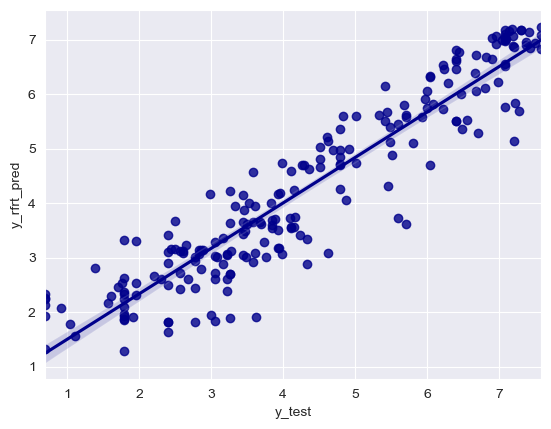

In [76]:
sns.regplot(y_test,y_rfrt_pred,color="DarkBlue")
plt.xlabel("y_test")
plt.ylabel("y_rfrt_pred")
plt.show()

##### EFFICIENCY ACHIEVED :

- Increased model R2 score.
- Improved mean squared error.

# Model Saving :

In [77]:
#Saving our best model

import joblib
joblib.dump(rfr_t,'global_power_plant_capacity.pkl')

['global_power_plant_capacity.pkl']

### 2.) To predict Fuel Type

In [78]:
#We will choose variable 'df4'for this :

df4.head()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,plant_age
0,1.252763,28.1839,4.307313,Solar,7.742862,7.792098,7.789485,7.805856,7.837063,7.0
1,4.595120,24.7663,4.325575,Coal,7.742862,7.792098,7.789485,7.805856,7.837063,5.0
2,3.693867,21.9038,4.253813,Wind,7.742862,7.792098,7.789485,7.805856,7.837063,5.0
3,4.912655,23.8712,4.525696,Gas,6.450120,6.427765,6.739037,6.787850,6.499448,14.0
4,7.496097,21.9603,4.423757,Coal,7.420154,8.018477,8.685647,8.739376,8.591666,3.0


In [79]:
#Label Encoding Primary Fuel :

label_col = ['primary_fuel']
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df4[label_col]=df4[label_col].apply(lambda x : label.fit_transform(x))

In [80]:
df4.head()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,plant_age
0,1.252763,28.1839,4.307313,6,7.742862,7.792098,7.789485,7.805856,7.837063,7.0
1,4.595120,24.7663,4.325575,1,7.742862,7.792098,7.789485,7.805856,7.837063,5.0
2,3.693867,21.9038,4.253813,7,7.742862,7.792098,7.789485,7.805856,7.837063,5.0
3,4.912655,23.8712,4.525696,2,6.450120,6.427765,6.739037,6.787850,6.499448,14.0
4,7.496097,21.9603,4.423757,1,7.420154,8.018477,8.685647,8.739376,8.591666,3.0


In [81]:
df4['primary_fuel'].value_counts() #Checking value count for target set.

1    237
3    236
6    126
7    123
2     65
0     50
5     21
4      9
Name: primary_fuel, dtype: int64

##### By watching value count of target variable we can examine that this is a problem of multiclass classification.Since,target set is imbalanced we will do oversampling.

In [82]:
x_ = df4.drop(columns=['primary_fuel'],axis=1)
y_ = df4['primary_fuel']

import imblearn
from imblearn.over_sampling import SMOTE

SM = SMOTE()
x_over,y_over = SM.fit_resample(x_,y_)

In [83]:
y_over.value_counts()

7    237
6    237
5    237
4    237
3    237
2    237
1    237
0    237
Name: primary_fuel, dtype: int64

In [84]:
#Scaling Feature Data

scalar=StandardScaler()
x_scaled = scalar.fit_transform(x_over)

In [85]:
#Importing models and metrics :

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,PrecisionRecallDisplay,plot_confusion_matrix,precision_score,recall_score

In [86]:
max_accu = 0
max_rs = 0
for i in range(50,300):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_over,test_size = 0.25, random_state = i)
    rfc = RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred = rfc.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.9113924050632911 on Random State 258


In [87]:
#Splitting data into train and test :

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_over,test_size=0.25,random_state=258)

# Random Forest Classifier

In [88]:
rslts=[] #Creating empty list to store results :

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', rfc.score(x_train,y_train))
print('TESTING SCORE : ', rfc.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
rslts.append(acc)

TRAINING SCORE :  1.0
TESTING SCORE :  0.9135021097046413
ACCURACY : 0.9135021097046413
*****************************
[[59  0  0  0  0  0  1  0]
 [ 1 44  6  4  2  1  0  7]
 [ 0  0 48  1  0  2  0  1]
 [ 0  3  3 51  0  0  0  0]
 [ 0  0  0  0 62  0  0  0]
 [ 0  0  1  0  0 60  0  0]
 [ 0  1  0  0  0  0 56  3]
 [ 1  0  0  0  0  0  3 53]]
*****************************
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        60
           1       0.92      0.68      0.78        65
           2       0.83      0.92      0.87        52
           3       0.91      0.89      0.90        57
           4       0.97      1.00      0.98        62
           5       0.95      0.98      0.97        61
           6       0.93      0.93      0.93        60
           7       0.83      0.93      0.88        57

    accuracy                           0.91       474
   macro avg       0.91      0.92      0.91       474
weighted avg       0.92      0.91      

# Decision Tree Classifier

In [89]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', dt.score(x_train,y_train))
print('TESTING SCORE : ', dt.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
rslts.append(acc)

TRAINING SCORE :  1.0
TESTING SCORE :  0.8523206751054853
ACCURACY : 0.8523206751054853
*****************************
[[54  2  0  0  0  0  3  1]
 [ 2 43  4  5  1  1  1  8]
 [ 0  4 40  4  0  3  0  1]
 [ 0  3  3 49  1  1  0  0]
 [ 0  1  0  0 61  0  0  0]
 [ 0  0  2  1  0 58  0  0]
 [ 0  3  0  0  0  0 50  7]
 [ 3  1  0  0  0  0  4 49]]
*****************************
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        60
           1       0.75      0.66      0.70        65
           2       0.82      0.77      0.79        52
           3       0.83      0.86      0.84        57
           4       0.97      0.98      0.98        62
           5       0.92      0.95      0.94        61
           6       0.86      0.83      0.85        60
           7       0.74      0.86      0.80        57

    accuracy                           0.85       474
   macro avg       0.85      0.85      0.85       474
weighted avg       0.85      0.85      

# Gradient Boosting

In [90]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

y_pred = gb.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', gb.score(x_train,y_train))
print('TESTING SCORE : ', gb.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
rslts.append(acc)

TRAINING SCORE :  0.9880450070323488
TESTING SCORE :  0.8818565400843882
ACCURACY : 0.8818565400843882
*****************************
[[59  0  0  0  0  0  1  0]
 [ 3 40  8  3  3  1  1  6]
 [ 0  1 46  1  0  3  0  1]
 [ 0  2  4 51  0  0  0  0]
 [ 0  0  0  0 62  0  0  0]
 [ 0  0  2  0  0 58  1  0]
 [ 1  1  0  0  0  0 53  5]
 [ 5  3  0  0  0  0  0 49]]
*****************************
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        60
           1       0.85      0.62      0.71        65
           2       0.77      0.88      0.82        52
           3       0.93      0.89      0.91        57
           4       0.95      1.00      0.98        62
           5       0.94      0.95      0.94        61
           6       0.95      0.88      0.91        60
           7       0.80      0.86      0.83        57

    accuracy                           0.88       474
   macro avg       0.88      0.88      0.88       474
weighted avg       0.88 

# K Neighbours

In [91]:
kn = KNeighborsClassifier()
kn.fit(x_train, y_train)

y_pred = kn.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', kn.score(x_train,y_train))
print('TESTING SCORE : ', kn.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
rslts.append(acc)

TRAINING SCORE :  0.870604781997187
TESTING SCORE :  0.8270042194092827
ACCURACY : 0.8270042194092827
*****************************
[[59  0  0  0  0  0  1  0]
 [ 3 34 12  3  4  1  1  7]
 [ 0  1 44  0  0  6  1  0]
 [ 0  7  4 45  0  1  0  0]
 [ 0  0  2  0 60  0  0  0]
 [ 0  1  2  0  0 57  0  1]
 [ 2  1  0  0  0  0 48  9]
 [ 5  0  0  0  0  1  6 45]]
*****************************
              precision    recall  f1-score   support

           0       0.86      0.98      0.91        60
           1       0.77      0.52      0.62        65
           2       0.69      0.85      0.76        52
           3       0.94      0.79      0.86        57
           4       0.94      0.97      0.95        62
           5       0.86      0.93      0.90        61
           6       0.84      0.80      0.82        60
           7       0.73      0.79      0.76        57

    accuracy                           0.83       474
   macro avg       0.83      0.83      0.82       474
weighted avg       0.83  

# Support Vector Classifier

In [92]:
svc = SVC()
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', svc.score(x_train,y_train))
print('TESTING SCORE : ', svc.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
rslts.append(acc)

TRAINING SCORE :  0.740506329113924
TESTING SCORE :  0.7130801687763713
ACCURACY : 0.7130801687763713
*****************************
[[59  0  0  0  0  0  1  0]
 [12 28 10  7  4  0  0  4]
 [ 0  4 38  0  0 10  0  0]
 [ 0  4  5 47  0  1  0  0]
 [ 0  0  1  0 61  0  0  0]
 [11  2  0  1  0 47  0  0]
 [ 9  2  0  0  0  0 39 10]
 [22  2  0  0  0  5  9 19]]
*****************************
              precision    recall  f1-score   support

           0       0.52      0.98      0.68        60
           1       0.67      0.43      0.52        65
           2       0.70      0.73      0.72        52
           3       0.85      0.82      0.84        57
           4       0.94      0.98      0.96        62
           5       0.75      0.77      0.76        61
           6       0.80      0.65      0.72        60
           7       0.58      0.33      0.42        57

    accuracy                           0.71       474
   macro avg       0.73      0.71      0.70       474
weighted avg       0.73  

In [93]:
#Creating DataFrame and storing all models result

result_df = pd.DataFrame({"ML Models":["Random Forest",
             "Decision Tree","Gradient Boosting","KNN","SVC"],"Score":rslts})
result_df

,ML Models,Score
0,Random Forest,0.913502
1,Decision Tree,0.852321
2,Gradient Boosting,0.881857
3,KNN,0.827004
4,SVC,0.713080


##### Cross Validation Score

In [94]:
cvrfc=cross_val_score(rfc,x_scaled,y_over,cv=5,scoring='accuracy')
cvdt=cross_val_score(dt,x_scaled,y_over,cv=5,scoring='accuracy')
cvsvc=cross_val_score(svc,x_scaled,y_over,cv=5,scoring='accuracy')
cvgb=cross_val_score(gb,x_scaled,y_over,cv=5,scoring='accuracy')
cvkn=cross_val_score(kn,x_scaled,y_over,cv=5,scoring='accuracy')


print("CV SCORE RANDOM FOREST : " , cvrfc.mean())
print("CV SCORE DECISION TREE : " , cvdt.mean())
print("CV SCORE SVC : " , cvsvc.mean())
print("CV SCORE GRADIENT BOOSTING : " , cvgb.mean())
print("CV SCORE K neighbours : " , cvkn.mean())

CV SCORE RANDOM FOREST :  0.8781696986529649
CV SCORE DECISION TREE :  0.8307068462713512
CV SCORE SVC :  0.7304818775170115
CV SCORE GRADIENT BOOSTING :  0.8528537703096791
CV SCORE K neighbours :  0.8175072906540757


##### Hence, as per cross validation and accuracy of a model Random Forest Classifier is best fit model.

# Hyperparameter tuning in Random forest

In [95]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [96]:
params = {'bootstrap':[True],
          'criterion': ['gini','entropy'],
         'max_depth':(5,10,15),
         'n_estimators': (100,200,300,400),
         }
grid = GridSearchCV(RandomForestClassifier()
                    ,param_grid=params,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': (5, 10, 15),
                         'n_estimators': (100, 200, 300, 400)})

In [97]:
grid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 15,
 'n_estimators': 100}

##### Tuning with the help of best parameters to improve score :

In [98]:
rfc_tuned = RandomForestClassifier(bootstrap=True,criterion='gini',max_depth=25,n_estimators=100,max_features='auto')
rfc_tuned.fit(x_train,y_train)

RandomForestClassifier(max_depth=25)

In [99]:
y_pred_rfc = rfc_tuned.predict(x_test)
acc = accuracy_score(y_test,y_pred_rfc)

print('TRAINING SCORE : ', rfc_tuned.score(x_train,y_train))
print('TESTING SCORE : ', rfc_tuned.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred_rfc))
print('*****************************')
print(classification_report(y_test,y_pred_rfc))

TRAINING SCORE :  1.0
TESTING SCORE :  0.9029535864978903
ACCURACY : 0.9029535864978903
*****************************
[[59  0  0  0  0  0  1  0]
 [ 1 42  7  4  2  1  1  7]
 [ 0  1 46  1  0  3  0  1]
 [ 0  3  4 50  0  0  0  0]
 [ 0  0  0  0 62  0  0  0]
 [ 0  0  1  0  0 60  0  0]
 [ 0  1  0  0  0  0 55  4]
 [ 1  0  0  0  0  0  2 54]]
*****************************
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        60
           1       0.89      0.65      0.75        65
           2       0.79      0.88      0.84        52
           3       0.91      0.88      0.89        57
           4       0.97      1.00      0.98        62
           5       0.94      0.98      0.96        61
           6       0.93      0.92      0.92        60
           7       0.82      0.95      0.88        57

    accuracy                           0.90       474
   macro avg       0.90      0.90      0.90       474
weighted avg       0.91      0.90      

# MODEL SAVING

In [100]:
import joblib
joblib.dump(rfc_tuned,'global_power_plant_fuel.pkl')

['global_power_plant_fuel.pkl']

# Since, ROC AUC curve is for only for binary classification problems.But, we can extend it to multiclass classification with the help for one vs. rest classifier

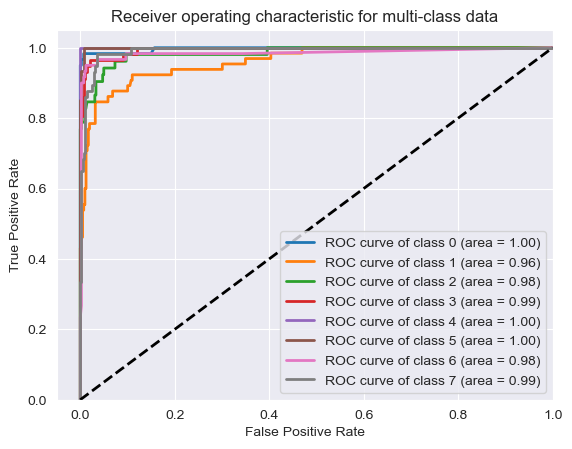

In [101]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc


# Learn to predict each class against the other

classifier = OneVsRestClassifier(rfc_tuned)
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

#Binarize the output
y_test_bin  = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

# Compute ROC curve and ROC area for each class

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
   
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

##### Conclusion :

- For predicting capacity of power plant we found Random Forest Regressor is best fit model,with accuracy of 87.5%


- For predicting fuel of power plant we found Random Forest Classifier is best fit model,with accuracy of 90.2 %





